# Ecosistema actual, Huggingface y modelos pre entrenados.

---

# Modelos:

## 1. [Swin Transformer](https://huggingface.co/docs/transformers/model_doc/swin)
- **Tipo:** Transformer jerárquico.
- **Características:**
  - Utiliza ventanas deslizantes (windowed attention) para atención local.
  - Crea representaciones jerárquicas a partir de imágenes.
  - Mejora la escalabilidad en procesamiento de imágenes de alta resolución.

## 2. [Convolutional Vision Transformer (CvT)](https://huggingface.co/docs/transformers/model_doc/cvt)
- **Tipo:** Híbrido CNN y Transformer.
- **Características:**
  - Aplica convoluciones iniciales para captura de características locales.
  - Utiliza bloques de Transformer para modelar relaciones globales.
  - Eficiente en tareas de visión con reducción de complejidad computacional.

## 3. [MobileViT](https://huggingface.co/docs/transformers/model_doc/mobilevit)
- **Tipo:** Arquitectura eficiente para dispositivos móviles.
- **Características:**
  - Integra convoluciones y Transformers de forma modular.
  - Diseñada para balancear rendimiento y eficiencia en recursos limitados.
  - Optimizada para aplicaciones en tiempo real.

## 4. [Pyramid Vision Transformer](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/pvt#transformers.PvtForImageClassification)
- **Tipo:** Transformer con enfoque en múltiples escalas.
- **Características:**
  - Implementa arquitectura en pirámide para procesamiento de imágenes.
  - Captura información a diferentes resoluciones, mejorando la generalización.
  - Eficaz en la detección de características tanto finas como gruesas.


## 5. [Masked Autoencoder](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/vit_mae#vitmae)
- **Tipo:** Autoencoder con enmascaramiento.
- **Características:**
  - Enmascara partes de la imagen durante el entrenamiento para aprendizaje de características.
  - Similar al enmascaramiento en modelos de lenguaje como BERT.
  - Facilita la transferencia de conocimiento para tareas de preentrenamiento y finetuning.

---
---

# Guía para Trabajar con Modelos Preentrenados de Imágenes en Hugging Face con PyTorch



## 1. Preprocesamiento de los Datos

- **Redimensionamiento y normalización**: La clase `ImageProcessor` ajusta automáticamente la imagen a las dimensiones que el modelo necesita.

    ```python
    from transformers import AutoImageProcessor
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    inputs = processor(images=image, return_tensors="pt")
    ```

- **Augmentación de datos**: Puedes usar librerías como `torchvision` para agregar augmentación de datos y mejorar el rendimiento del modelo.

    ```python
    import torchvision.transforms as transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    ```
---

## 2. Trabajando con Modelos Preentrenados de Imágenes

### Pasos para usar modelos preentrenados:

1. **Instalación de librerías**: Hace falta tener instalada la librería `transformers` de Hugging Face, ya que ofrece acceso a modelos preentrenados y procesadores para el preprocesamiento de datos.

2. **Cargar el modelo y el procesador**: Se utiliza `AutoImageProcessor` para cargar el procesador que realizará el preprocesamiento de las imágenes (ajustes de tamaño, normalización, etc.), y por ejemplo `AutoModelForImageClassification` para cargar el modelo de clasificación preentrenado.

    ```python
    from transformers import AutoImageProcessor, AutoModelForImageClassification
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")
    ```

3. **Preprocesar las imágenes**: Se utiliza el procesador para convertir la imagen en un formato adecuado (tensor), que luego puede ser alimentado al modelo.

4. **Inferencia y uso de logits**: Los logits son los valores sin normalizar que el modelo genera para cada clase de salida. En una tarea de clasificación, estos logits indican qué tan seguro está el modelo de que una imagen pertenece a una clase específica. El índice del logit maximo corresponde a la clase predicha.

    **Ejemplo de uso de logits**:
    ```python
    inputs = processor(images=image, return_tensors="pt")  
    outputs = model(**inputs)  
    logits = outputs.logits 
    ```

5. **Interpretar los logits**:  Para obtener la clase predicha, se toma el índice del logit más alto y se asocia con la etiqueta de la clase correspondiente.


    ```python
    predicted_class_idx = logits.argmax(-1).item() 
     print(f"Predicción de clase: {model.config.id2label[predicted_class_idx]}") 
    ```


---

## 3. Finetuning 

El **finetuning** ajusta un modelo preentrenado para tareas específicas utilizando un conjunto de datos más pequeño. Esto se logra actualizando los pesos de las últimas capas.

### Pasos para realizar finetuning:


```python
from transformers import Trainer, TrainingArguments

# Argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir="results path",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    save_strategy="epoch",
    logging_dir="login path",
)

# Definir Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    tokenizer=processor
)

# Entrenamiento
trainer.train()
```

---

### Recursos:
- [Documentación de Hugging Face Transformers](https://huggingface.co/docs/transformers/index)
- [Procesamiento de Imágenes](https://huggingface.co/docs/transformers/main_classes/image_processor)
- [Entrenamiento y Finetuning](https://huggingface.co/docs/transformers/training)



---
---
# Tarea: Fine-tuning de un modelo Vision Transformer

1. **Objetivo**: 
   Seleccione un modelo preentrenado que utilice Vision Transformers (ViTs) y un conjunto de datos adecuado. Realice un proceso de fine-tuning del modelo seleccionado.

   Pueden encontrar la documentacion de Transformers de Hugging Face en [Link](https://huggingface.co/docs/transformers/index)

   Datasets de imágenes en Hugging Face [Link](https://huggingface.co/datasets?modality=modality:image&sort=downloads)

   O pueden usar fuentes de preferencia.

   
2. **Una vez finalizado el fine-tuning**:
   - Justifique la elección del modelo preentrenado y del dataset.
   - Explique el proceso de fine-tuning realizado, especificando los parámetros ajustados y las modificaciones necesarias.
   - Evalúe el rendimiento del modelo preentrenado sin ajustes y compárelo con los resultados obtenidos tras el fine-tuning, discutiendo las mejoras o diferencias observadas.
---

A continuación sigue una pequeña ayuda:

In [11]:
#!pip install transformers, datasets, diffusers, accelerate
#!pip install --upgrade jupyter ipywidgets

### Otra forma de buscar los datos en HuggingFace

In [6]:
from huggingface_hub import list_datasets, dataset_info
keywords = ["beans", "images", "MMU"]  # Lista de palabras clave
datasets = list_datasets()
dataset_details = []
for dataset in datasets:
    if any(keyword in dataset.id for keyword in keywords):
        try:
            info = dataset_info(dataset.id)
            dataset_details.append({
                "id": dataset.id,
                "downloads": getattr(info, 'downloads', 0),  # Cantidad de descargas, predeterminado 0
                "likes": getattr(info, 'likes', 0), 
                "comments": getattr(info, 'comments', 0) 
            })
        except Exception as e:
            print(f"Error al obtener información del dataset {dataset.id}: {e}")
sorted_datasets = sorted(dataset_details, key=lambda x: x['downloads'], reverse=True)
for dataset in sorted_datasets[:20]: # 20 datasets más descargados
    print(f"{dataset['id']}: {dataset['downloads']} descargas")

lmms-lab/MMMU: 472850 descargas
MMMU/MMMU: 195088 descargas
dbzadnen/breast-histopathology-images: 30468 descargas
JMMMU/JMMMU: 8388 descargas
yuvalkirstain/PickaPic-images: 4739 descargas
yuvalkirstain/pickapic_v1_no_images: 2663 descargas
bitmind/open-images-v7: 1964 descargas
MMMU/MMMU_Pro: 1357 descargas
lmms-lab/CMMMU: 1313 descargas
ashraq/fashion-product-images-small: 1014 descargas
bhargavsdesai/laion_improved_aesthetics_6.5plus_with_images: 796 descargas
trashsock/hands-images: 565 descargas
EmbeddingStudio/amazon-products-with-images: 374 descargas
dalle-mini/open-images: 351 descargas
ahmed-masry/chartqa_without_images: 303 descargas
PaulLerner/viquae_images: 248 descargas
eduagarcia-temp/BLUEX_without_images: 225 descargas
AI-Lab-Makerere/beans: 219 descargas
Riksarkivet/test_images_demo: 192 descargas
RealTimeData/bbc_images_alltime: 186 descargas


### Eligimos un set de datos y lo traemos

In [17]:
from datasets import load_dataset, DownloadConfig
download_config = DownloadConfig(delete_extracted=True, download_desc=None)
dataset = load_dataset("AI-Lab-Makerere/beans")

In [22]:
print(dataset)
print(dataset['train'].features)
print(dataset['train'][0])
print(dataset['train'].features['labels'].names)


print(f"Tamaño del conjunto de entrenamiento: {len(dataset['train'])}")
print(f"Tamaño del conjunto de validación: {len(dataset['validation'])}")
print(f"Tamaño del conjunto de prueba: {len(dataset['test'])}")

DatasetDict({
    train: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 1034
    })
    validation: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 133
    })
    test: Dataset({
        features: ['image_file_path', 'image', 'labels'],
        num_rows: 128
    })
})
{'image_file_path': Value(dtype='string', id=None), 'image': Image(mode=None, decode=True, id=None), 'labels': ClassLabel(names=['angular_leaf_spot', 'bean_rust', 'healthy'], id=None)}
{'image_file_path': '/home/albert/.cache/huggingface/datasets/downloads/extracted/967f0d9f61a7a8de58892c6fab6f02317c06faf3e19fba6a07b0885a9a7142c7/train/angular_leaf_spot/angular_leaf_spot_train.0.jpg', 'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x500 at 0x7F69189287F0>, 'labels': 0}
['angular_leaf_spot', 'bean_rust', 'healthy']
Tamaño del conjunto de entrenamiento: 1034
Tamaño del conjunto de validación: 133
Tamaño del conjunto de prueba: 12

### Eligimos un modelo pre entrenado y lo traemos

Modelo Swin Transformer entrenado en [ImageNet-1K](https://www.image-net.org/about.php) con una resolución de 224x224.

Fue presentado en el artículo [Swin Transformer: Hierarchical Vision Transformer using Shifted Windows" de Liu et al](https://arxiv.org/abs/2103.14030). 

Se lanzó por primera vez en este repositorio [Link](https://github.com/microsoft/Swin-Transformer)

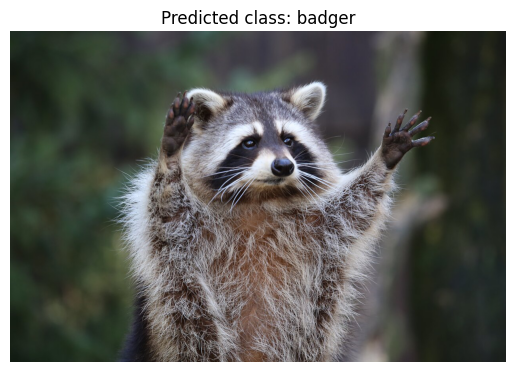

In [15]:
from transformers import AutoImageProcessor, SwinForImageClassification
import torch
import matplotlib.pyplot as plt
from PIL import Image


path = "/app/ProjectsDocker/Trabajos_Practicos/TP1/raccoon.jpg"
image = Image.open(path)


image_processor = AutoImageProcessor.from_pretrained("microsoft/swin-tiny-patch4-window7-224")
model = SwinForImageClassification.from_pretrained("microsoft/swin-tiny-patch4-window7-224")


inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
predicted_class = model.config.id2label[predicted_label]  


plt.imshow(image)
plt.axis('off') 
plt.title(f'Predicted class: {predicted_class}') 
plt.show()


# * * *
